In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("Datasets/BTC_NASDAQ_AUG22-AUG23.csv")

In [4]:
df.head()

,Date,BTC_Close,BTC_Vol,NASDAQ_Close,NASDAQ_Vol,BTC_Chg%,NASDAQ_Chg%
0,15/08/2022,21534.12109,2.087640e+11,12705.21973,24086490000,0.000000,0.000000
1,22/08/2022,19616.81445,2.233460e+11,12141.70996,20877800000,-0.089036,-0.044353
2,29/08/2022,19986.71289,2.085110e+11,11630.86035,22893680000,0.018856,-0.042074
3,05/09/2022,21769.25586,2.595290e+11,12112.30957,17800080000,0.089186,0.041394
4,12/09/2022,19419.50586,2.619000e+11,11448.40039,26454340000,-0.107939,-0.054813


In [5]:
df.describe()

,BTC_Close,BTC_Vol,NASDAQ_Close,NASDAQ_Vol,BTC_Chg%,NASDAQ_Chg%
count,54.000000,5.400000e+01,54.000000,5.400000e+01,54.000000,54.000000
mean,23747.812175,1.608154e+11,12032.758428,2.288073e+10,0.008154,0.001748
std,4867.658229,8.195016e+10,1148.159960,5.074359e+09,0.073038,0.030558
min,16291.832030,1.193846e+10,10321.389650,3.376535e+09,-0.218533,-0.056492
25%,19476.571288,9.933557e+10,11139.274660,2.179026e+10,-0.025234,-0.019293
50%,23258.439455,1.404810e+11,11805.614745,2.332016e+10,0.001291,0.003485
75%,28299.615233,1.976572e+11,12908.072755,2.566143e+10,0.020558,0.022237
max,30620.769530,4.714090e+11,14316.660160,3.104905e+10,0.265058,0.080960


Text(0, 0.5, 'BTC USD')

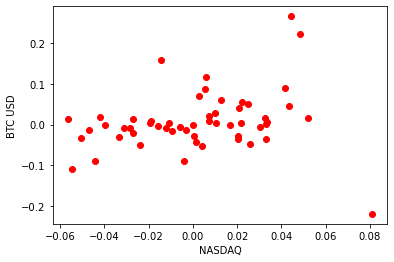

In [9]:
plt.scatter(df["NASDAQ_Chg%"],df["BTC_Chg%"], color="red")
plt.xlabel("NASDAQ")
plt.ylabel("BTC USD")

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

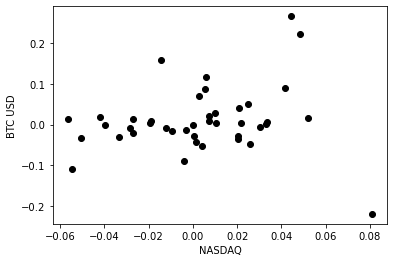

In [11]:
plt.scatter(train["NASDAQ_Chg%"], train["BTC_Chg%"], color="black")
plt.xlabel("NASDAQ")
plt.ylabel("BTC USD")
plt.show()

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["NASDAQ_Chg%"]])
train_y = np.asanyarray(train[["BTC_Chg%"]])
regr.fit(train_x, train_y)

print(f"Coefficients: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")

Coefficients: [[0.39331779]]
Intercept: [0.01025751]


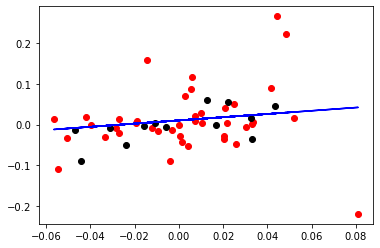

In [17]:
plt.scatter(train["NASDAQ_Chg%"], train["BTC_Chg%"], color="red")
plt.scatter(test["NASDAQ_Chg%"], test["BTC_Chg%"], color="black")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')

In [18]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['NASDAQ_Chg%']])
test_y = np.asanyarray(test[['BTC_Chg%']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.19
